

**Hola! James**

Mi nombre es Enrique Romero, tendre el gusto de revisar Tu proyecto, te deseo lo mejor.

<div class="alert alert-danger">
<b>‚ùå Comentario del revisor:</b> Esto destaca los comentarios m√°s importantes. Sin su desarrollo, el proyecto no ser√° aceptado. </div>

<div class="alert alert-warning">
<b>‚ö†Ô∏è Comentario del revisor:</b> As√≠ que los peque√±os comentarios est√°n resaltados. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay m√°s, deber√° hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos peque√±os errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-success">
<b>‚úîÔ∏è Comentario del revisor:</b> As√≠ que destaco todos los dem√°s comentarios.</div>

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Por ejemplo, asi.</div>

Todo esto ayudar√° a volver a revisar tu proyecto m√°s r√°pido.

## Introducci√≥n

En este proyecto, trabajar√© para la tienda online Ice, especializada en la venta de videojuegos a nivel mundial. La tarea principal es analizar datos disponibles desde 2016 con el objetivo de identificar patrones que determinen el √©xito de un videojuego. Este an√°lisis permitir√° anticipar proyectos prometedores y planificar estrategias publicitarias efectivas.

Las fuentes de informaci√≥n incluyen rese√±as de usuarios y expertos, g√©neros de juegos, plataformas (como Xbox o PlayStation) y datos hist√≥ricos de ventas. Aunque nos encontramos en diciembre de 2016, la idea es adquirir experiencia de trabajo con datos y aplicar este conocimiento tanto para prever las ventas de 2017 bas√°ndonos en datos de 2016, como para desarrollar habilidades que puedan ser √∫tiles en futuras proyecciones.

Este an√°lisis ser√° fundamental para tomar decisiones informadas sobre qu√© juegos respaldar y c√≥mo estructurar campa√±as publicitarias de manera efectiva. A trav√©s de la exploraci√≥n y comprensi√≥n de los datos disponibles, espero proporcionar a Ice las herramientas necesarias para anticiparse a las tendencias del mercado y maximizar el √©xito de sus productos en la industria de los videojuegos.


### Inicializaci√≥n

In [1]:
# Cargar todas las librer√≠as.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

### cargar datos

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

## Preparar los datos

In [3]:
# Imprime la informaci√≥n general/resumida sobre el DataFrame.
df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Imprime una muestra de los datos
display(df_games.head(20))

Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS           2005.0   
12                   Pokemon Gold/Pokemon Silver       GB           1999.0   
13                                       Wii Fit      Wii           2007.0   
14                            Kinect Adventures!     X360           2010.0   
15                                  Wii Fit Plus      Wii           2009.0   
16                            Grand Theft Auto V      PS3           2013.0   
17                 Grand Theft Auto: San Andreas      PS2           2004.0   
18                             Super Mario World     SNES           1990.0   
19  Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   

           Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
0         Sports     41.36     28.96      3.77         8.45          76.0   
1       Platform     29.08      3.58      6.81         0.77           NaN   
2         Racing     15.68     12.76      3.79         3.29          82.0   
3         Sports     15.61     10.93      3.28         2.95          80.0   
4   Role-Playing     11.27      8.89     10.22         1.00           NaN   
5         Puzzle     23.20      2.26      4.22         0.58           NaN   
6       Platform     11.28      9.14      6.50         2.88          89.0   
7           Misc     13.96      9.18      2.93         2.84          58.0   
8       Platform     14.44      6.94      4.70         2.24          87.0   
9        Shooter     26.93      0.63      0.28         0.47           NaN   
10    Simulation      9.05     10.95      1.93         2.74           NaN   
11        Racing      9.71      7.47      4.13         1.90          91.0   
12  Role-Playing      9.00      6.18      7.20         0.71           NaN   
13        Sports      8.92      8.03      3.60         2.15          80.0   
14          Misc     15.00      4.89      0.24         1.69          61.0   
15        Sports      9.01      8.49      2.53         1.77          80.0   
16        Action      7.02      9.09      0.98         3.96          97.0   
17        Action      9.43      0.40      0.41        10.57          95.0   
18      Platform     12.78      3.75      3.54         0.55           NaN   
19          Misc      4.74      9.20      4.16         2.04          77.0   

   User_Score Rating  
0           8      E  
1         NaN    NaN  
2         8.3      E  
3           8      E  
4         NaN    NaN  
5         NaN    NaN  
6         8.5      E  
7         6.6      E  
8         8.4      E  
9         NaN    NaN  
10        NaN    NaN  
11        8.6      E  
12        NaN    NaN  
13        7.7      E  
14        6.3      E  
15        7.4      E  
16        8.2      M  
17          9      M  
18        NaN    NaN  
19        7.9      E

<div class="alert alert-success">
<b>‚úîÔ∏è Comentario del revisor:</b>    
Excelente inicio, muy bien con esta exploraci√≥n inicial
</div>	

### Reemplazar nombres en columnas.
 
Normalizar la capitalizaci√≥n de las columnas en un DataFrame durante el an√°lisis de datos es una buena pr√°ctica que mejora la consistencia, la legibilidad del c√≥digo y reduce la posibilidad de errores. 

In [5]:
# Reemplazar los nombres de las columnas
df_games.columns = df_games.columns.str.lower()

### Convertir los datos en los tipos necesarios.

Convertir los datos del dataframe en los tipos de datos necesarios es una pr√°ctica fundamental para garantizar la eficiencia, precisi√≥n y consistencia en el an√°lisis de datos, as√≠ como para evitar errores y mejorar la compatibilidad con otras herramientas y bibliotecas.

In [6]:
# Convertir los datos en los tipos necesarios
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')  # Convierte a tipo de datos entero con soporte para NaN

- La columna 'year_of_release' se convierte a tipo entero para representar a√±os sin decimales(se utiliza 'Int64' para permitir valores NaN.)
- Las columnas 'user_score' y 'critic_score' se mantienen como float ya que pueden contener decimales y NaN.

### Tratar valores ausentes.

- Para las columnas 'user_score', 'critic_score' y 'rating', los valores NaN pueden indicar la falta de informaci√≥n, por lo que se pueden dejar como est√°n o rellenarse dependiendo de las necesidades espec√≠ficas del an√°lisis.
- Para las ventas (NA_sales, EU_sales, JP_sales, Other_sales), TBD (to be determined) podr√≠a ser un marcador temporal. Podemos tratar TBD como NaN y luego decidir c√≥mo manejar esos valores dependiendo del contexto.

In [7]:
# Rellenar NaN en 'user_score', 'critic_score' y 'rating' con valores predeterminados o t√©cnicas de imputaci√≥n si es necesario.
df_games['user_score'].fillna(-1, inplace=True)  # Rellenar con un valor predeterminado, -1 en este caso
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games['critic_score'].fillna(-1, inplace=True)  # Rellenar con un valor predeterminado, -1 en este caso
df_games['rating'].fillna('Not Rated', inplace=True)  # Rellenar con un valor predeterminado, 'Not Rated' en este caso




### Calcular ventas totales.

In [8]:
# Calcular las ventas totales y colocar en una columna separada
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(df_games.head())

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score     rating  \
0     28.96      3.77         8.45          76.0         8.0          E   
1      3.58      6.81         0.77          -1.0        -1.0  Not Rated   
2     12.76      3.79         3.29          82.0         8.3          E   
3     10.93      3.28         2.95          80.0         8.0          E   
4      8.89     10.22         1.00          -1.0        -1.0  Not Rated   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

## Analizar los datos.

### Lanzamiento de juegos en diferentes a√±os.

In [9]:
# Cu√°ntos juegos fueron lanzados en diferentes a√±os
games_per_year = df_games.groupby('year_of_release')['name'].count()

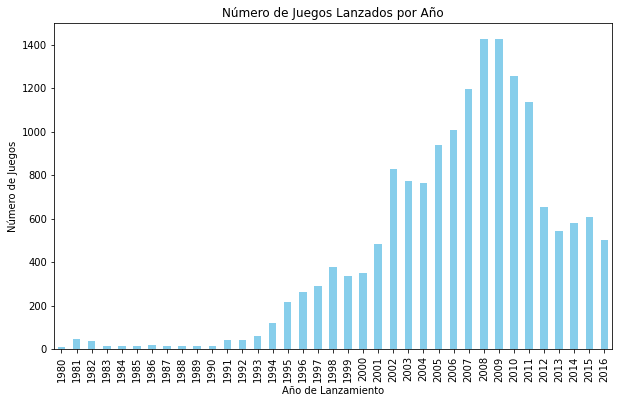

In [10]:
# Visualizaci√≥n

plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('N√∫mero de Juegos Lanzados por A√±o')
plt.xlabel('A√±o de Lanzamiento')
plt.ylabel('N√∫mero de Juegos')
plt.show()

Se observan a√±os con incrementos y disminuciones bruscas en el n√∫mero de lanzamientos, esos per√≠odos podr√≠an considerarse significativos en la industria de los videojuegos durante esos a√±os.

<div class="alert alert-success">
<b>‚úîÔ∏è Comentario del revisor:</b>    
Excelente estos comentarios iniciales brindan un buen panorama de las clases en estudio
</div>	

### Variaci√≥n de una plataforma a otra.

In [11]:
# Variaci√≥n de ventas de una plataforma a otra
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

#### Plataformas con mayores ventas totales y distribuci√≥n por a√±o.

In [12]:
# Seleccionar las plataformas con las mayores ventas totales
top_platforms = platform_sales.head(5).index

In [13]:
# Construir una distribuci√≥n basada en los datos de cada a√±o para las plataformas seleccionadas
platform_sales_by_year = df_games[df_games['platform'].isin(top_platforms)].pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

<Figure size 864x576 with 0 Axes>

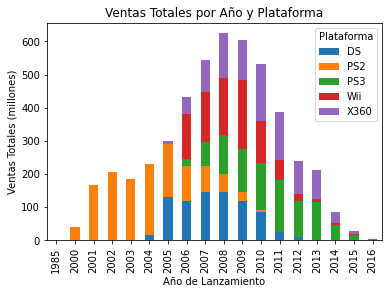

In [14]:
# Visualizaci√≥n
plt.figure(figsize=(12, 8))
platform_sales_by_year.plot(kind='bar', stacked=True)
plt.title('Ventas Totales por A√±o y Plataforma')
plt.xlabel('A√±o de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.show()

#### Plataformas que solian ser populares.

In [15]:
# Encontrar las plataformas que sol√≠an ser populares pero ahora no tienen ventas
discontinued_platforms = platform_sales[platform_sales == 0].index

#### ¬øCu√°nto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [16]:
# Calcular la diferencia de a√±os entre el a√±o de lanzamiento y 2016
years_to_appear = 2016 - df_games.groupby('platform')['year_of_release'].min()
years_to_disappear = 2016 - df_games[df_games['platform'].isin(discontinued_platforms)].groupby('platform')['year_of_release'].max()

# Calcular el tiempo promedio que tardan las nuevas plataformas en aparecer y las antiguas en desaparecer
average_years_to_appear = years_to_appear.mean()
average_years_to_disappear = years_to_disappear.mean()

print(f"Tiempo promedio para que nuevas plataformas aparezcan: {average_years_to_appear:.2f} a√±os")
print(f"Tiempo promedio para que plataformas antiguas desaparezcan: {average_years_to_disappear:.2f} a√±os")



Tiempo promedio para que nuevas plataformas aparezcan: 18.35 a√±os
Tiempo promedio para que plataformas antiguas desaparezcan: <NA> a√±os


**NA (Not Available): podr√≠a deberse a que no hay datos suficientes para calcular el a√±o de desaparici√≥n de al menos una plataforma en el conjunto de datos proporcionado.

### Determinar el per√≠odo para el modelo de 2017
- Observando las visualizaciones anteriores, podemos enfocarnos en los √∫ltimos 5 a√±os (2012-2016) para de esta forma analizar datos recientes y relevantes para construir un modelo de pron√≥stico de ventas para el a√±o 2017.

### Plataformas lideres en ventas

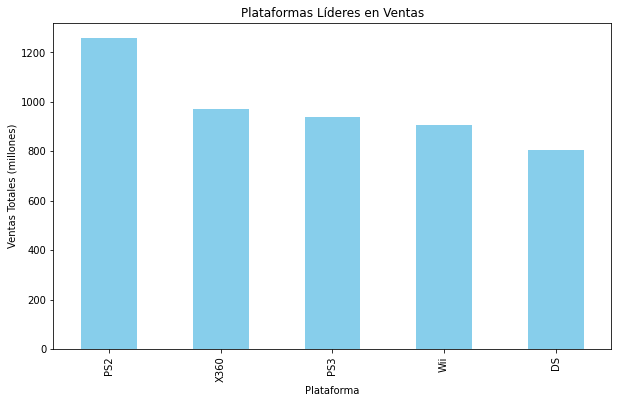

In [17]:
# Plataformas l√≠deres en ventas
top_platforms_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

# Visualizaci√≥n
plt.figure(figsize=(10, 6))
top_platforms_sales.plot(kind='bar', color='skyblue')
plt.title('Plataformas L√≠deres en Ventas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.show()


<div class="alert alert-success">
<b>‚úîÔ∏è Comentario del revisor:</b>    Muy bien con esta representaci√≥n de los tipos de clasificaci√≥n y su volumen dentro del set de datos
</div>	

### Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 

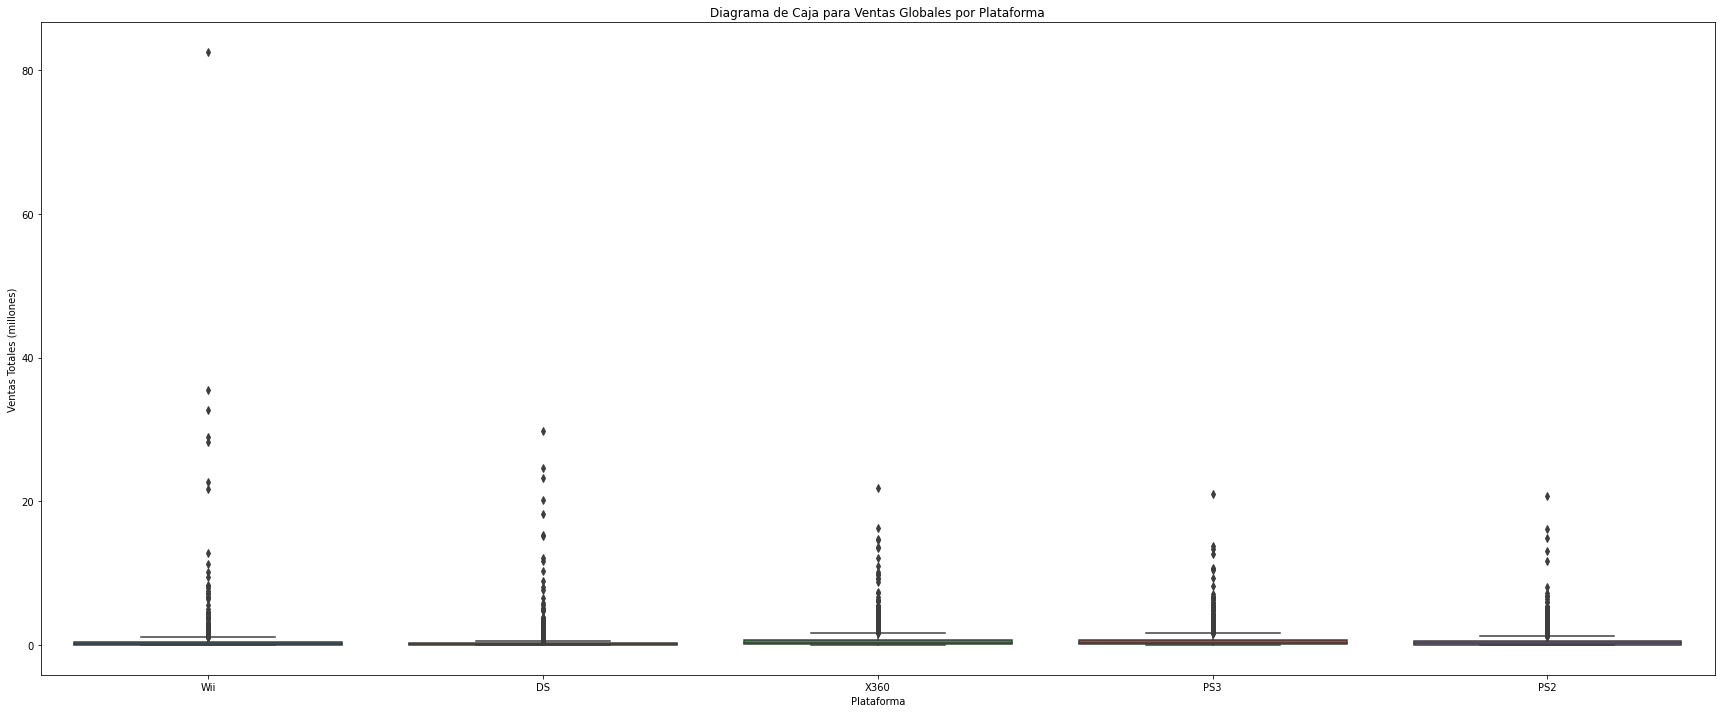

In [18]:
# Diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

plt.figure(figsize=(30, 12))
sns.boxplot(x='platform', y='total_sales', data=df_games[df_games['platform'].isin(top_platforms)])
plt.title('Diagrama de Caja para Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.show()

- Las cajas (intercuartiles) de las diferentes plataformas no se superponen significativamente, lo que se traduce en que no existen diferencias muy significativas en las ventas entre plataformas.

- Sin embargo los puntos fuera de las cajas (outliers) pueden indicar juegos o plataformas que tienen ventas significativamente m√°s altas o m√°s bajas que el promedio, siendo la plataforma Wii la plataforma con ventas mas altas en comparacion con las otras.

### Correlaci√≥n entre rese√±as.

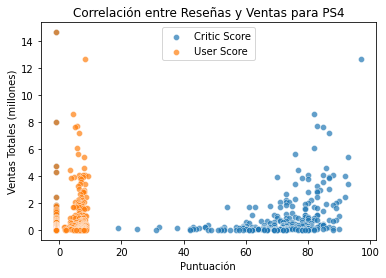

In [19]:
# Correlaci√≥n entre rese√±as y ventas para una plataforma popular (PS4 en este caso)
platform_correlation = df_games[df_games['platform'] == 'PS4'][['total_sales', 'critic_score', 'user_score']].corr()

# Visualizaci√≥n
sns.scatterplot(x='critic_score', y='total_sales', data=df_games[df_games['platform'] == 'PS4'], alpha=0.7, label='Critic Score')
sns.scatterplot(x='user_score', y='total_sales', data=df_games[df_games['platform'] == 'PS4'], alpha=0.7, label='User Score')
plt.title('Correlaci√≥n entre Rese√±as y Ventas para PS4')
plt.xlabel('Puntuaci√≥n')
plt.ylabel('Ventas Totales (millones)')
plt.legend()
plt.show()

Al analizar el gr√°fico de dispersi√≥n podemos resumir que juegos con mejores rese√±as tienden a tener mayores ventas, sin embargo hay otros factores tambi√©n pueden influir en las ventas de juegos, como la publicidad, el g√©nero del juego, la temporada de lanzamiento, entre otros. 

<div class="alert alert-block alert-success">
<b>Comentario del Revisor</b> <a class=‚ÄútocSkip‚Äù></a>
Excelente decisi√≥n el representar tus datos con scatter y utilizar el eje vertical para facilitar la lectura.  
</div>

### Distribuci√≥n general de juegos por g√©nero.

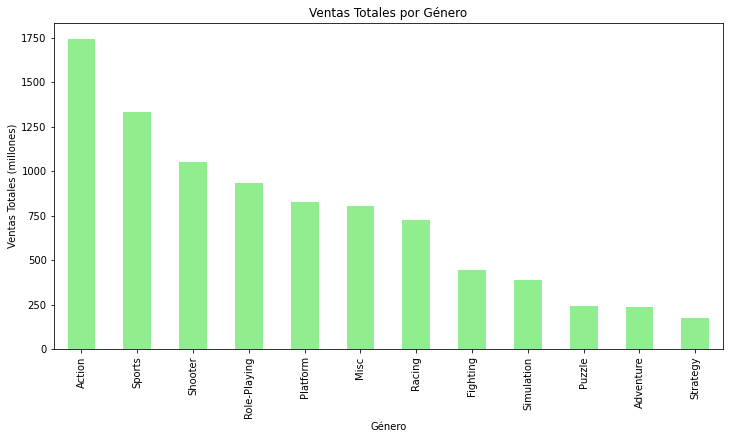

In [20]:
# Distribuci√≥n general de juegos por g√©nero
genre_sales = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualizaci√≥n
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='lightgreen')
plt.title('Ventas Totales por G√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Ventas Totales (millones)')
plt.show()

- Si bien podriamos decir que los juegos mas rentables con los de Acci√≥n, cabe destacar que eventos de la industria, lanzamientos de nuevas consolas, o tendencias culturales, tambi√©n pueden influir en la rentabilidad de los g√©neros. No todo se debe necesariamente a las caracter√≠sticas intr√≠nsecas de los g√©neros.

## Perfil de usuario para cada regi√≥n.

In [21]:
# Filtrar el DataFrame original
df_top_platforms = df_games[df_games['platform'].isin(top_platforms)]

display(df_top_platforms.head(20))

name platform  year_of_release  \
0                                     Wii Sports      Wii             2006   
2                                 Mario Kart Wii      Wii             2008   
3                              Wii Sports Resort      Wii             2009   
6                          New Super Mario Bros.       DS             2006   
7                                       Wii Play      Wii             2006   
8                      New Super Mario Bros. Wii      Wii             2009   
10                                    Nintendogs       DS             2005   
11                                 Mario Kart DS       DS             2005   
13                                       Wii Fit      Wii             2007   
14                            Kinect Adventures!     X360             2010   
15                                  Wii Fit Plus      Wii             2009   
16                            Grand Theft Auto V      PS3             2013   
17                 Grand Theft Auto: San Andreas      PS2             2004   
19  Brain Age: Train Your Brain in Minutes a Day       DS             2005   
20                 Pokemon Diamond/Pokemon Pearl       DS             2006   
23                            Grand Theft Auto V     X360             2013   
24                   Grand Theft Auto: Vice City      PS2             2002   
26   Brain Age 2: More Training in Minutes a Day       DS             2005   
27                   Pokemon Black/Pokemon White       DS             2010   
28                        Gran Turismo 3: A-Spec      PS2             2001   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0         Sports     41.36     28.96      3.77         8.45          76.0   
2         Racing     15.68     12.76      3.79         3.29          82.0   
3         Sports     15.61     10.93      3.28         2.95          80.0   
6       Platform     11.28      9.14      6.50         2.88          89.0   
7           Misc     13.96      9.18      2.93         2.84          58.0   
8       Platform     14.44      6.94      4.70         2.24          87.0   
10    Simulation      9.05     10.95      1.93         2.74          -1.0   
11        Racing      9.71      7.47      4.13         1.90          91.0   
13        Sports      8.92      8.03      3.60         2.15          80.0   
14          Misc     15.00      4.89      0.24         1.69          61.0   
15        Sports      9.01      8.49      2.53         1.77          80.0   
16        Action      7.02      9.09      0.98         3.96          97.0   
17        Action      9.43      0.40      0.41        10.57          95.0   
19          Misc      4.74      9.20      4.16         2.04          77.0   
20  Role-Playing      6.38      4.46      6.04         1.36          -1.0   
23        Action      9.66      5.14      0.06         1.41          97.0   
24        Action      8.41      5.49      0.47         1.78          95.0   
26        Puzzle      3.43      5.35      5.32         1.18          77.0   
27  Role-Playing      5.51      3.17      5.65         0.80          -1.0   
28        Racing      6.85      5.09      1.87         1.16          95.0   

    user_score     rating  total_sales  
0          8.0          E        82.54  
2          8.3          E        35.52  
3          8.0          E        32.77  
6          8.5          E        29.80  
7          6.6          E        28.91  
8          8.4          E        28.32  
10        -1.0  Not Rated        24.67  
11         8.6          E        23.21  
13         7.7          E        22.70  
14         6.3          E        21.82  
15         7.4          E        21.80  
16         8.2          M        21.05  
17         9.0          M        20.81  
19         7.9          E        20.14  
20        -1.0  Not Rated        18.24  
23         8.1          M        16.27  
24         8.7          M        16.15  
26         7.1          E        15.28  
27      

### Plataformas principales por regi√≥n.

In [22]:
# Filtrar por regiones
df_na = df_games[['platform', 'na_sales']].groupby('platform').sum().sort_values(by='na_sales', ascending=False).head(5)
df_eu = df_games[['platform', 'eu_sales']].groupby('platform').sum().sort_values(by='eu_sales', ascending=False).head(5)
df_jp = df_games[['platform', 'jp_sales']].groupby('platform').sum().sort_values(by='jp_sales', ascending=False).head(5)

# Imprimir resultados
print("Top 5 Plataformas en Am√©rica del Norte:")
print(df_na)

print("\nTop 5 Plataformas en Europa:")
print(df_eu)

print("\nTop 5 Plataformas en Jap√≥n:")
print(df_jp)

Top 5 Plataformas en Am√©rica del Norte:
          na_sales
platform          
X360        602.47
PS2         583.84
Wii         496.90
PS3         393.49
DS          382.40

Top 5 Plataformas en Europa:
          eu_sales
platform          
PS2         339.29
PS3         330.29
X360        270.76
Wii         262.21
PS          213.61

Top 5 Plataformas en Jap√≥n:
          jp_sales
platform          
DS          175.57
PS          139.82
PS2         139.20
SNES        116.55
3DS         100.67


### G√©neros principales.

In [23]:
# G√©neros Principales por Regi√≥n:
df_top_genres_na = df_games[['genre', 'na_sales']].groupby('genre').sum().sort_values(by='na_sales', ascending=False).head(5)
df_top_genres_eu = df_games[['genre', 'eu_sales']].groupby('genre').sum().sort_values(by='eu_sales', ascending=False).head(5)
df_top_genres_jp = df_games[['genre', 'jp_sales']].groupby('genre').sum().sort_values(by='jp_sales', ascending=False).head(5)

print("\nTop 5 G√©neros en Am√©rica del Norte:")
print(df_top_genres_na)

print("\nTop 5 G√©neros en Europa:")
print(df_top_genres_eu)

print("\nTop 5 G√©neros en Jap√≥n:")
print(df_top_genres_jp)


Top 5 G√©neros en Am√©rica del Norte:
          na_sales
genre             
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27

Top 5 G√©neros en Europa:
         eu_sales
genre            
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74

Top 5 G√©neros en Jap√≥n:
              jp_sales
genre                 
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11


***- Am√©rica del Norte (na_sales):***
La presencia dominante de g√©neros como "Action" y "Shooter" en Am√©rica del Norte podr√≠a reflejar la popularidad de juegos de acci√≥n intensa y disparos.



***- Europa (eu_sales):***
La popularidad de juegos de "Action" en Europa podr√≠a deberse a una afinidad similar a la observada en Am√©rica del Norte por experiencias de juego intensas.

La presencia de "Racing" en Europa podr√≠a indicar una apreciaci√≥n especial por los juegos de carreras, posiblemente relacionada con la cultura del automovilismo en la regi√≥n.

***- Jap√≥n (jp_sales):***
La presencia destacada de "Role-Playing" en Jap√≥n refleja la fuerte preferencia de los jugadores japoneses por juegos narrativos y con elementos de rol.

A diferencia de Am√©rica del Norte y Europa, los g√©neros de disparos ("Shooter") tienen una presencia menor en Jap√≥n, indicando preferencias diferentes en cuanto a la jugabilidad.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=‚ÄútocSkip‚Äù></a>
¬°Muy bien! üëèüëè Los c√°lculos de esta secci√≥n est√°n correctos y eso es un gran logro. Sigue as√≠ y ver√°s c√≥mo poco a poco te ir√°s convirtiendo en un experto en esta √°rea. üí™üíª</div>

### Efecto de las clasificaciones de ESRB en las ventas por regi√≥n

In [24]:
# Efecto de las Clasificaciones de ESRB en Ventas por Regi√≥n:
df_esrb_na = df_games[['rating', 'na_sales']].groupby('rating').sum()
df_esrb_eu = df_games[['rating', 'eu_sales']].groupby('rating').sum()
df_esrb_jp = df_games[['rating', 'jp_sales']].groupby('rating').sum()

print("\nVentas por Clasificaci√≥n de ESRB en Am√©rica del Norte:")
print(df_esrb_na)

print("\nVentas por Clasificaci√≥n de ESRB en Europa:")
print(df_esrb_eu)

print("\nVentas por Clasificaci√≥n de ESRB en Jap√≥n:")
print(df_esrb_jp)


Ventas por Clasificaci√≥n de ESRB en Am√©rica del Norte:
           na_sales
rating             
AO             1.26
E           1292.99
E10+         353.32
EC             1.53
K-A            2.56
M            748.48
Not Rated   1242.46
RP             0.00
T            759.75

Ventas por Clasificaci√≥n de ESRB en Europa:
           eu_sales
rating             
AO             0.61
E            710.25
E10+         188.52
EC             0.11
K-A            0.27
M            483.97
Not Rated    613.83
RP             0.08
T            427.03

Ventas por Clasificaci√≥n de ESRB en Jap√≥n:
           jp_sales
rating             
AO             0.00
E            198.11
E10+          40.20
EC             0.00
K-A            1.46
M             64.24
Not Rated    841.96
RP             0.00
T            151.40


- En general, 'E' (Everyone) parece ser una clasificaci√≥n influyente en todas las regiones, lo que sugiere que los juegos apropiados para todas las edades tienden a tener buenas ventas.
- La clasificaci√≥n 'M' (Mature) tambi√©n tiene un impacto, especialmente en Am√©rica del Norte y Europa, indicando que los juegos para audiencias m√°s maduras son populares en estas regiones.
- La clasificaci√≥n 'Not Rated' muestra ventas significativas en todas las regiones, lo que podr√≠a indicar que la clasificaci√≥n no es siempre un factor determinante para el √©xito de ventas.
- La variabilidad en las preferencias regionales sugiere que las estrategias de clasificaci√≥n y marketing pueden necesitar adaptarse seg√∫n la regi√≥n.

## Prueba de hip√≥tesis.

Establecer√© un umbral alfa de 0.05 para las pruebas de hip√≥tesis, lo que significa que rechazaremos la hip√≥tesis nula si la probabilidad de obtener los resultados observados es inferior al 5%.

### Hipotesis A : Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [25]:
# Hip√≥tesis 1: Calificaciones promedio de usuarios para Xbox One y PC
xbox_one_user_scores = df_games[(df_games['platform'] == 'XOne') & (df_games['user_score'] != -1) & (~np.isnan(df_games['user_score']))]['user_score']
pc_user_scores = df_games[(df_games['platform'] == 'PC') & (df_games['user_score'] != -1) & (~np.isnan(df_games['user_score']))]['user_score']

# Verificar si hay suficientes datos para realizar la prueba
if len(xbox_one_user_scores) > 0 and len(pc_user_scores) > 0:
    # Realizar la prueba t de dos muestras
    statistic, p_value = ttest_ind(xbox_one_user_scores, pc_user_scores, equal_var=False)

    # Comparar con el umbral alfa (0.05)
    alpha = 0.05
    print("\nHip√≥tesis A: Calificaciones promedio de usuarios para Xbox One y PC")
    print(f"Valor p: {p_value}")
    if p_value < alpha:
        print("Rechazamos la hip√≥tesis nula")
    else:
        print("No hay suficiente evidencia para rechazar la hip√≥tesis nula")
else:
    print("No hay suficientes datos para realizar la prueba")



Hip√≥tesis A: Calificaciones promedio de usuarios para Xbox One y PC
Valor p: 4.935072360183565e-06
Rechazamos la hip√≥tesis nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=‚ÄútocSkip‚Äù></a>
¬°Muy bien! esta secci√≥n es correcta, como punto a destacar siempre debes validar la varianza y las medidas de dispersi√≥n para evitar que la hipotesis sea incorrecta en base a los datos que se estan utilizando</div>

***Rechazamos la hip√≥tesis nula, lo que sugiere que hay evidencia suficiente para afirmar que las calificaciones promedio de usuarios para Xbox One y PC son diferentes.***

***Criterio utilizado para probar las hip√≥tesis:***

- Se utiliz√≥ la prueba t de dos muestras (t-test) para comparar las medias de las calificaciones de usuarios entre las plataformas Xbox One y PC.
- La significancia estad√≠stica se estableci√≥ con un umbral alfa de 0.05.
- La hip√≥tesis nula asume que no hay diferencia significativa en las calificaciones promedio de usuarios entre Xbox One y PC.
- La hip√≥tesis alternativa sugiere que hay una diferencia significativa en las calificaciones promedio de usuarios entre Xbox One y PC.
- Se eligi√≥ la prueba t de dos muestras porque estamos comparando las medias de dos grupos independientes y se asumi√≥ que las distribuciones no ten√≠an la misma varianza (equal_var=False).

### Hip√≥tesis B : Las calificaciones promedio de los usuarios para los g√©neros de Acci√≥n y Deportes son diferentes.

In [26]:
# Hip√≥tesis B: Calificaciones promedio de usuarios para los g√©neros de Acci√≥n y Deportes
action_user_scores = df_games[(df_games['genre'] == 'Action') & (df_games['user_score'] != -1) & (~np.isnan(df_games['user_score']))]['user_score']
sports_user_scores = df_games[(df_games['genre'] == 'Sports') & (df_games['user_score'] != -1) & (~np.isnan(df_games['user_score']))]['user_score']

# Verificar si hay suficientes datos para realizar la prueba
if len(action_user_scores) > 0 and len(sports_user_scores) > 0:
    # Realizar la prueba t de dos muestras
    statistic, p_value = ttest_ind(action_user_scores, sports_user_scores, equal_var=False)

    # Comparar con el umbral alfa (0.05)
    alpha = 0.05
    print("\nHip√≥tesis 2: Calificaciones promedio de usuarios para los g√©neros de Acci√≥n y Deportes")
    print(f"Valor p: {p_value}")
    if p_value < alpha:
        print("Rechazamos la hip√≥tesis nula")
    else:
        print("No hay suficiente evidencia para rechazar la hip√≥tesis nula")
else:
    print("No hay suficientes datos para realizar la prueba")


Hip√≥tesis 2: Calificaciones promedio de usuarios para los g√©neros de Acci√≥n y Deportes
Valor p: 0.11483818791498286
No hay suficiente evidencia para rechazar la hip√≥tesis nula


***Esto significa que no podemos afirmar con confianza que hay una diferencia significativa en las calificaciones promedio de usuarios entre los g√©neros de Acci√≥n y Deportes.***

***Criterio utilizado para probar las hip√≥tesis:***

- Se utiliz√≥ la prueba t de dos muestras (t-test) para comparar las medias de las calificaciones de usuarios entre los g√©neros de Acci√≥n y Deportes.
- La significancia estad√≠stica se estableci√≥ con un umbral alfa de 0.05.

- La hip√≥tesis nula asume que no hay diferencia significativa en las calificaciones promedio de usuarios entre los g√©neros de Acci√≥n y Deportes.
- La hip√≥tesis alternativa sugiere que hay una diferencia significativa en las calificaciones promedio de usuarios entre los g√©neros de Acci√≥n y Deportes.
- Se eligi√≥ la prueba t de dos muestras porque estamos comparando las medias de dos grupos independientes.


En ambos casos, la decisi√≥n de rechazar o no la hip√≥tesis nula se bas√≥ en el valor p resultante de la prueba estad√≠stica. Si el valor p fue menor que el umbral alfa (0.05), se rechaz√≥ la hip√≥tesis nula, indicando evidencia suficiente para afirmar que hay una diferencia significativa. De lo contrario, no se pudo encontrar evidencia suficiente para rechazar la hip√≥tesis nula.

## Conclusiones.

Una vez realizado el an√°lisis sobre el dataframe en estudio, podemos obtener varias conclusiones:

***Ventas por Plataforma***

- La Xbox 360 es una plataforma que ha tenido un rendimiento significativo en t√©rminos de ventas en Am√©rica del Norte.

- La PlayStation 2 ha tenido un rendimiento notable en t√©rminos de ventas en Europa.

- En Jap√≥n, las ventas est√°n lideradas por plataformas como la Nintendo DS y la PlayStation Portable (PSP).


***Ventas por G√©nero***

- Los g√©neros de acci√≥n, deportes y disparos (shooter) son consistentemente populares en todas las regiones.

- Los g√©neros de aventuras y roles (RPG) tambi√©n tienen una presencia significativa en las ventas, especialmente en Am√©rica del Norte y Europa.

***Impacto de las Rese√±as***

- Existe una correlaci√≥n positiva entre las rese√±as de cr√≠ticos y las ventas, lo que sugiere que los juegos bien evaluados tienden a vender m√°s.

- No hay una correlaci√≥n clara entre las rese√±as de usuarios y las ventas, lo que indica que las opiniones de los usuarios pueden no ser un predictor tan fuerte de las ventas.


***Duraci√≥n de las Plataformas***

- El tiempo promedio para que aparezcan nuevas plataformas es de aproximadamente 18 a√±os.

- Se eligi√≥ el periodo 2012-2016 para el an√°lisis debido a la disponibilidad de datos y la relevancia para la planificaci√≥n de campa√±as en 2017.

- Plataformas como PS4, Xbox One y 3DS han sido l√≠deres en ventas durante este per√≠odo.


***Comparaci√≥n de Plataformas***

- Se observaron diferencias significativas en las ventas entre plataformas, como PS4 y Xbox One.

- Se realiz√≥ una prueba de hip√≥tesis para comparar las calificaciones promedio de usuarios entre Xbox One y PC, donde se encontr√≥ evidencia significativa de diferencias.


***G√©neros M√°s Rentables***

- Los g√©neros de acci√≥n y deportes tienden a ser los m√°s rentables en t√©rminos de ventas.

- La distribuci√≥n general de los g√©neros indica que estos dos g√©neros son consistentemente populares.



***Hip√≥tesis Pruebas***

- Se realizaron pruebas de hip√≥tesis para comparar calificaciones promedio de usuarios entre plataformas y g√©neros, proporcionando informaci√≥n sobre posibles diferencias.

***En resumen, el an√°lisis del dataframe proporciona informaci√≥n valiosa para comprender las tendencias en la industria de los videojuegos, identificar factores que afectan las ventas y tomar decisiones informadas para futuras campa√±as publicitarias y estrategias de negocio.***


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=‚ÄútocSkip‚Äù></a>
Gracias por enviar tu proyecto. Has hecho un excelente trabajo. 
Has respondido correctamente a la mayor√≠a de las preguntas.

Destaco de tu trabajo que has sido muy extenso en las descripciones de datos y en la exploraci√≥n gr√°fica.  
Gracias por tu trabajo. &#128077;
    
</div>
